<h2> Simple linear regression</h2>
<p> We perform a linear regression on a cluster of 2D points. So we assume that the y coordinates can be related with the abscissa following </p>
$$y = \beta_0 + x \beta_1 + \epsilon$$

The two parameters  $\beta_0$ and $\beta_1$ are the components of the vector $\vec{\beta}$.

For each point at position $(x_k, y_k)$ with $k=1, 2, \cdots, m$, our linear model will predict a value $\hat{y}_k = \beta_0 + x_k \beta_1$ that has to be close to the actual $y_k$ coordinate of the point called the target values. All the $y_k$ values are the components of the vector $\vec{y}$.

We define the $X$ matrix as a $m \times 2$ matrix called the features matrix. The first column of $X$ has all its elements at $1$ and the second column are the abscissa $x_k$. So we have
$$ \hat{y} = X\beta $$

To find the parameters $\beta_0$ and $\beta_1$, we minimise a cost function by gradient descent. The cost function is 
$$J = \frac{1}{2m}\sum_{k=1}^m (y_k - \hat{y}_k)^2$$

 We choose $0$ as the initial values of the parameters. Then at each iteration of the gradient descent algorithm we update the parameters values according
$$\vec{\beta} \rightarrow \vec{\beta} - \alpha \vec{\nabla}_{\vec{\beta}} J$$

where $\alpha$ is the learning rate. The cost function's gradient is 
$$\vec{\nabla}_{\vec{\beta}} J = \frac{1}{m} X^T \left( X \vec{\beta} - \vec{y} \right)$$

<h4> Creation of the cluster of points </h4>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def linear_points_generation(nb, x_min, x_max, a, b, sigma):
    """ Create a cloud of 'nb' points in 2D with abscissa uniformly distributed
    between 'x_min' and 'x_max. The y coordinates are randomly distributed
    according a normal distribution with a standard deviation 'sigma'
    around a linear function.
    :return: two vectors, one with the x values and one with the y values"""
    vx = (x_max - x_min) * np.random.random_sample(nb) + x_min
    vy = a * vx + b + np.random.randn(nb) * sigma
    return vx, vy

We create a cluster $\beta_0= 5$ and $\beta_1=0.8$. The standard deviation of the individual variability is set to $1$.

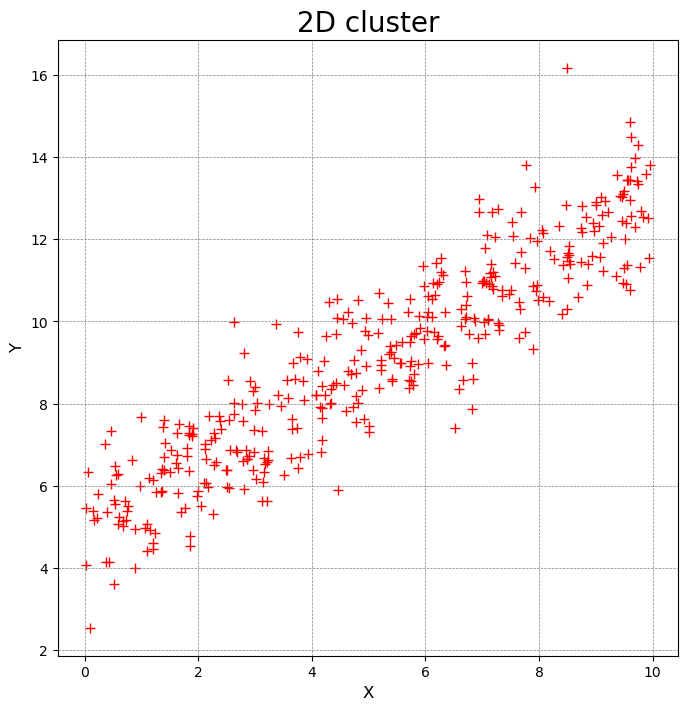

In [16]:
nb_points = 400
beta_0 = 5.
beta_1 = 0.8
x_values, y_values = linear_points_generation(nb_points, 0., 10., beta_1, beta_0, 1.)
fig, ax1 = plt.subplots(1, 1, figsize=(8, 8))
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.scatter(x_values, y_values, c='red', marker='+', s=50, linewidths=1.)
ax1.set_title("2D cluster", fontsize=20)
ax1.set_xlabel("X", fontsize=12)
ax1.set_ylabel("Y", fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.grid(color='gray', linestyle='--', linewidth=0.5)

<h4> Creation of the matrices </h4>

In [22]:
xmat = np.array([np.ones(nb_points), x_values]).transpose()
ymat = np.reshape(y_values, (nb_points, -1))
theta = np.zeros((2, 1))

<h4> Minimisation procedure </h4>
<p>The definition of the cost function, of its gradient and the minimisation by gradient descent are encapsulated in a class. </p>
<p> At each step of the minimization in the 'grad_descent' method, if the cost function doesn't decrease, the learning rate is divided by two.</p>

In [23]:
class Reglin:
    """ Encapsulates data and methods for the linear regression"""
    def __init__(self, xm, ym, thv, alpha, nbit):
        """
        :param xm: features matrix (nb_items X nb_features+1)
        :param ym: target values (nb_items X 1)
        :param thv: model's parameters (nb_features + 1)
        :param alpha: learning rate
        :param nbit: number of iterations of the gradient descent
        """
        self.caract = xm
        self.cible = ym
        self.param = thv
        self.step = alpha
        self.nb_iter = nbit
        self.cost_hist = []

    def cost(self, p=[]):
        """
        Compute de cost function. If 'p' is not empty, uses 'p' as the parameters instead of 'self.params'.
        """
        if len(p) > 0:
            cost = np.sum(np.square(self.caract @ p - self.cible)) / (2 * self.cible.size)
        else:
            cost = np.sum(np.square(self.caract @ self.param - self.cible)) / (2 * self.cible.size)
        return cost

    def grad_cost(self):
        """
        Compute the derivatives od the cost function with respect to each parameter
        """
        return (self.caract.transpose() @ (self.caract @ self.param - self.cible)) / self.cible.size

    def grad_descent(self):
        """ Performs the parameters optimization by gradient descent.
        Check the cost value and adapt the learning rate if the cost doesn't decrease.
        Save the evolution of the cost function during the optimization in 'cost_hist'."""
        i = 0
        while i < self.nb_iter:
            cost = self.cost()
            if i == 0:
                self.cost_hist.append(cost)
            grad = self.grad_cost()
            newparam = self.param - self.step * grad
            newcost = self.cost(newparam)
            if newcost <= cost:
                self.cost_hist.append(newcost)
                self.param = newparam
                i += 1
            else:
                self.step /= 2.
        self.cost_hist.append(self.cost())

We create an instance of the Reglin class with our data and we perform the minimization.

In [31]:
nb_iter = 5000
learning_rate = 0.01
one_reglin = Reglin(xmat, ymat, theta, learning_rate, nb_iter)
one_reglin.grad_descent()
print("final parameters: ", one_reglin.param)

final parameters:  [[4.93965971]
 [0.80941333]]


The parameters obtained are close to the parameters used to create the cluster ($5$ and $0.8$) despite the variability of individual points. 

We display the model obtained against the line used the create the cluster and the values of the cost function for the 20 first iterations.

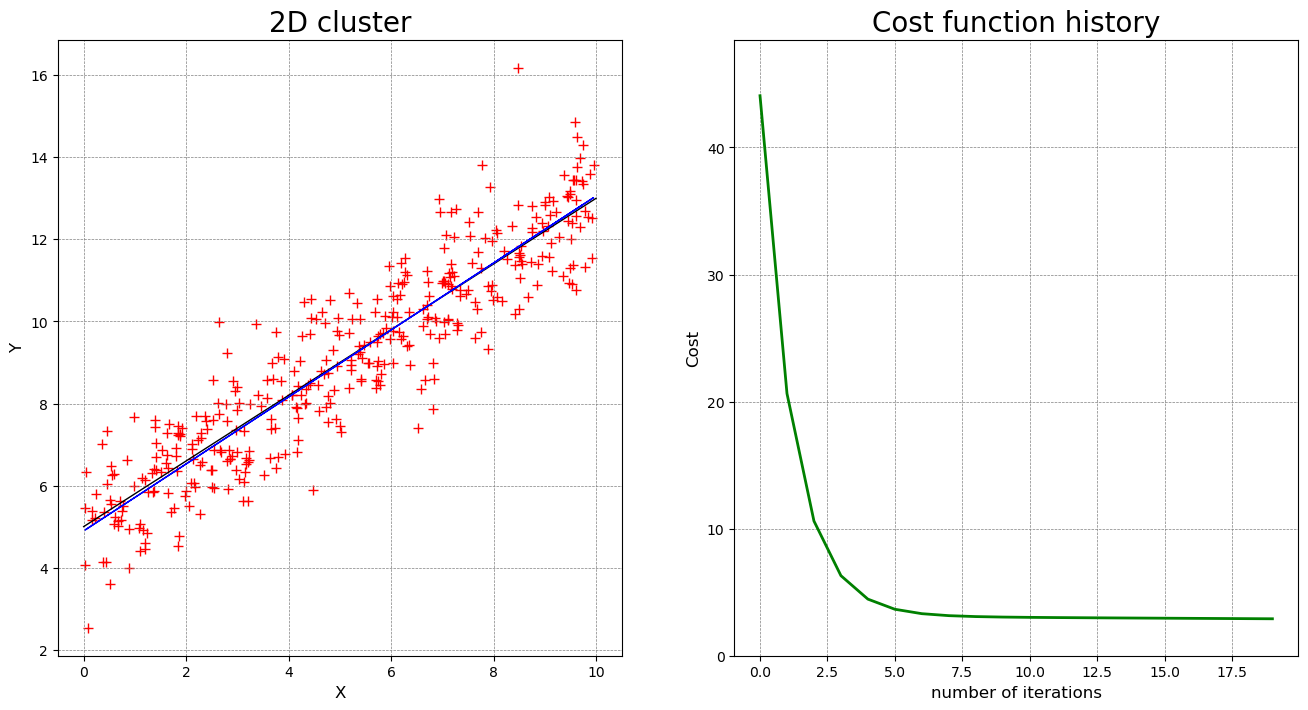

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.scatter(x_values, y_values, c='red', marker='+', s=50, linewidths=1.)
absc = np.linspace(0., 10., 2, endpoint=True)
ax1.plot(absc, beta_1 * absc + beta_0, c='black', linewidth=1)
ax1.plot(x_values, xmat @ one_reglin.param, c='blue', linewidth=1)
ax1.set_title("2D cluster", fontsize=20)
ax1.set_xlabel("X", fontsize=12)
ax1.set_ylabel("Y", fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.grid(color='gray', linestyle='--', linewidth=0.5)

lidx = list(range(20))
ax2.plot(lidx, one_reglin.cost_hist[0:20], c='green', linewidth=2)
ax2.set_ylim((0., one_reglin.cost_hist[0]*1.1))
ax2.set_title("Cost function history", fontsize=20)
ax2.set_xlabel("number of iterations", fontsize=12)
ax2.set_ylabel("Cost", fontsize=12)
ax2.tick_params(axis='both', which='major', labelsize=10)
ax2.grid(color='gray', linestyle='--', linewidth=0.5)

plt.show()

<h4> Normal equations </h4>
The paramaters can be obtained by solving the so called normal equations
$$ X^TX \vec{\beta} = X^T \vec{y}$$

We use the technique of the pseudo-inverse from the scipy library to solve this linear system as the $X^TX$ matrix is ill conditionned.

In [32]:
from scipy import linalg

beta_norm = linalg.pinvh(xmat.transpose() @ xmat) @ xmat.transpose() @ ymat
print("normal parameters: ", beta_norm)

normal parameters:  [[4.93970121]
 [0.80940706]]


The results are almost identical to the results from gradient descent.